In [47]:
using LinearAlgebra
using Plots

El Hamiltoniano que se nos plantea en el caso para $N = 3$ qubits es

$H = A_1 \cos(\theta) + A_2 \sin(\theta)$

donde $A_1$ y $A_2$ son operadores aleatorios, en el paper se realizó lo siguiente 

- Choose different eigenstates $\ket{\varphi_n}$ and plot their expectations on $A_1$ and $A_2$ 
- Plot the energy of $H$ with respect to the eigenstates $\ket{\varphi_n}$ as a function of $\theta$, for $n=0,...,7$


In [143]:
N = 3 # number of qubits
d = 2^N # dimension of the Hilbert space
A1 = rand(d,d) #+ im*randn(d,d)
A2 = rand(d,d) #+ im*randn(d,d)

8×8 Matrix{Float64}:
 0.876714  0.0934138  0.627859   …  0.70397   0.25113    0.426683
 0.80768   0.457539   0.681008      0.840946  0.534955   0.710521
 0.671302  0.141047   0.0167911     0.286294  0.735954   0.69217
 0.360932  0.318884   0.361772      0.708624  0.618812   0.467866
 0.560006  0.139736   0.493547      0.469463  0.429882   0.842819
 0.999879  0.776185   0.223731   …  0.111259  0.643664   0.0688336
 0.15751   0.14384    0.696196      0.729349  0.285213   0.400416
 0.153223  0.970535   0.892662      0.933105  0.0256432  0.431962

In [144]:
x = 0.5 # 
H = A1.*cos(x) + A2.*sin(x) # Hamiltonian

8×8 Matrix{Float64}:
 0.790774  0.758634  1.1394    0.694739  …  1.18162   0.929297  0.863448
 0.947631  0.382768  1.17749   0.568295     0.548424  0.85532   0.393171
 1.18621   0.779298  0.827112  0.61992      0.423898  0.652745  0.382057
 0.550323  0.622689  0.696883  0.701788     0.693439  0.881179  0.37306
 1.11963   0.32166   0.714147  1.02876      0.709119  0.889273  0.41866
 1.16148   1.11289   0.700679  0.501097  …  0.699634  0.951519  0.0402152
 0.38293   0.374549  0.784178  0.340805     1.15178   0.276059  0.797578
 0.375647  0.647188  1.0114    0.65414      0.688788  0.709507  0.799342

In [145]:
eigvec = eigen(H).vectors
eigenvecadj = adjoint(eigvec) # Matriz adjunta de eigenvectores Duda: ¿los vectores bras de este Hamiltoniano son los vectores adjuntos? 

function expectationvalue(eigvec,eigenvecadj)
    expvalueA1 = zeros(ComplexF64, d,d)
    expvalueA2 = zeros(ComplexF64, d,d)
    for i in 1:d 
        vecadji = transpose(eigenvecadj[i,:])
        for j in 1:d
            veci = eigvec[:,i]
            expvalueA1[i,j] = vecadji*A1*veci
            expvalueA2[i,j] = vecadji*A2*veci
        end
    end
    return expvalueA1, expvalueA2
end

expectationvalue (generic function with 2 methods)

In [146]:
expectationvalue(eigvec,eigenvecadj)[1]

8×8 Matrix{ComplexF64}:
 -0.312285-0.298225im  -0.312285-0.298225im  …  -0.312285-0.298225im
 -0.312285+0.298225im  -0.312285+0.298225im     -0.312285+0.298225im
  0.140518+0.0im        0.140518+0.0im           0.140518+0.0im
  0.058653-0.327871im   0.058653-0.327871im      0.058653-0.327871im
  0.058653+0.327871im   0.058653+0.327871im      0.058653+0.327871im
  0.302219-0.204997im   0.302219-0.204997im  …   0.302219-0.204997im
  0.302219+0.204997im   0.302219+0.204997im      0.302219+0.204997im
   4.50047+0.0im         4.50047+0.0im            4.50047+0.0im

In [147]:
function a1vsa2(xin,step,xfin, n) #n = 1 es el estado fundamental y n = 2 es el primer estado excitado, etc
    x = xin:step:xfin
    a1 = zeros(ComplexF64,length(x))
    a2 = zeros(ComplexF64,length(x))
    for i in 1:length(x)
        H = A1.*cos(x[i]) + A2.*sin(x[i])
        eigvec = eigen(H).vectors
        eigenvecadj = adjoint(eigvec) 
        rho = kron(eigvec[n,:],transpose(eigenvecadj[:,n])) # Matriz de densidad para el estado fundamental
        a1[i] = tr(rho*A1)
        a2[i] = tr(rho*A2)
    end
    return a1,a2
end

a1vsa2 (generic function with 2 methods)

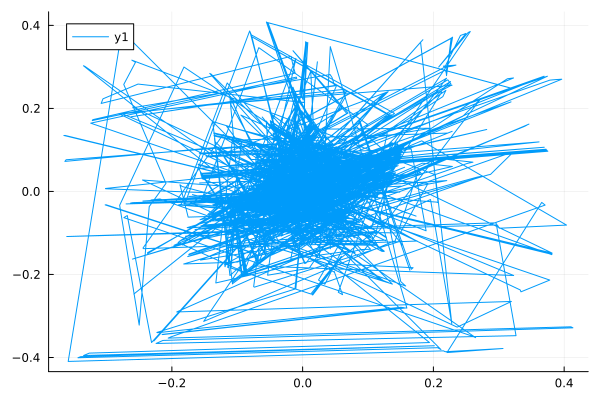

In [156]:
alpha = a1vsa2(0,0.001,6,1)
beta = a1vsa2(0,0.001,6,2)
gamma = a1vsa2(0,0.001,6,3)
plot(imag(alpha[1]),imag(alpha[2]))

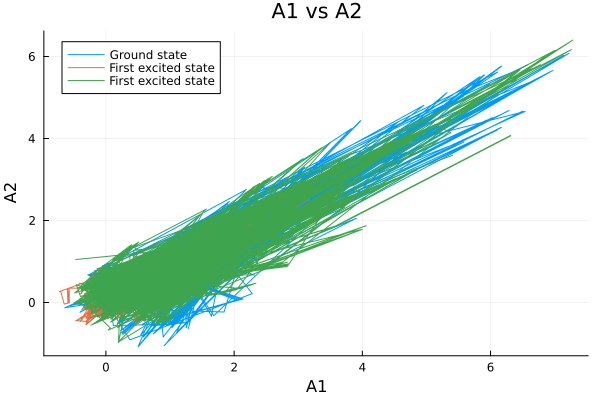

In [157]:
plot(real(alpha[1]),real(alpha[2]),xlabel = "A1", ylabel = "A2", label = "Ground state", title = "A1 vs A2")
plot!(real(beta[1]),real(beta[2]),xlabel = "A1", ylabel = "A2", label = "First excited state", title = "A1 vs A2")
plot!(real(gamma[1]),real(gamma[2]),xlabel = "A1", ylabel = "A2", label = "First excited state", title = "A1 vs A2")

In [150]:
function energyvsparameter(xmin,step,xmax)
    x = xmin:step:xmax
    energy = zeros(ComplexF64,d,length(x))
    for i in 1:length(x)
        H = A1.*cos(x[i]) + A2.*sin(x[i])
        energy[:,i] = eigen(H).values
    end
    return energy
end

energyvsparameter (generic function with 1 method)

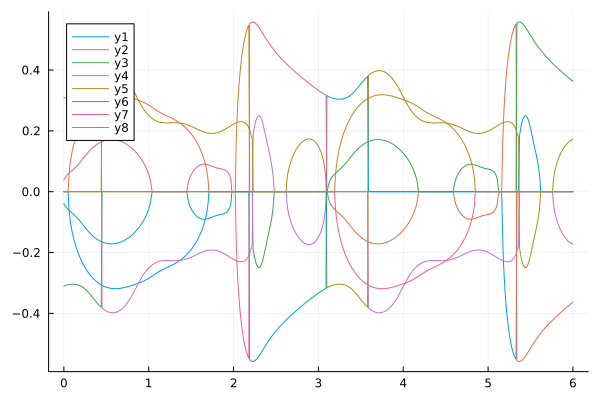

In [151]:
a = imag(energyvsparameter(0,0.01,6))
x = 0:0.01:6
plot(x,a')

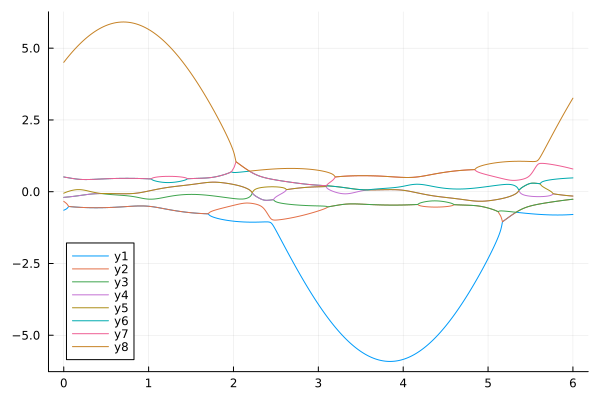

In [152]:
b = real(energyvsparameter(0,0.01,6))
x = 0:0.01:6
plot(x,b')

In [164]:
ket_n = eigvec[:,1]
bra_n = adjoint(ket_n)

1×8 adjoint(::Vector{ComplexF64}) with eltype ComplexF64:
 0.137639-0.153423im  -0.151995-0.32311im  …  0.0957666-0.0898231im

In [165]:
ket_n*bra_n

8×8 Matrix{ComplexF64}:
   0.042483+0.0im         0.0286519-0.0677919im  …   0.0269621+0.0023296im
  0.0286519+0.0677919im    0.127502+0.0im            0.0144667+0.0445958im
 -0.0673509-0.0168537im  -0.0723178+0.096108im      -0.0418205-0.0143896im
 -0.0100119+0.0200289im   0.0252087+0.0294845im     -0.0074524+0.0121625im
  -0.015802+0.0422312im   0.0567326+0.0536981im     -0.0123447+0.0259358im
 -0.0819553+0.0121389im  -0.0359028+0.138966im   …  -0.0526791+0.00320993im
  0.0951684-0.106082im    -0.105094-0.223409im       0.0662164-0.0621068im
  0.0269621-0.0023296im   0.0144667-0.0445958im      0.0172394+0.0im

In [167]:
kron(ket_n,bra_n)

8×8 Matrix{ComplexF64}:
   0.042483+0.0im         0.0286519-0.0677919im  …   0.0269621+0.0023296im
  0.0286519+0.0677919im    0.127502+0.0im            0.0144667+0.0445958im
 -0.0673509-0.0168537im  -0.0723178+0.096108im      -0.0418205-0.0143896im
 -0.0100119+0.0200289im   0.0252087+0.0294845im     -0.0074524+0.0121625im
  -0.015802+0.0422312im   0.0567326+0.0536981im     -0.0123447+0.0259358im
 -0.0819553+0.0121389im  -0.0359028+0.138966im   …  -0.0526791+0.00320993im
  0.0951684-0.106082im    -0.105094-0.223409im       0.0662164-0.0621068im
  0.0269621-0.0023296im   0.0144667-0.0445958im      0.0172394+0.0im